plot 0


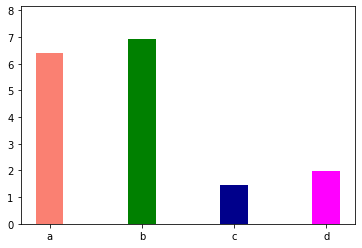

In [61]:
#! /usr/bin/env python

import os
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import random
import math

plot_dir = 'plots'
annot_dir = 'annots'


cat_labels = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456-. ()'

num_plots = 1

num_bars = [2,3,4,5,6,7,8,9,10]

group_ratio = 0.3

num_groups = [2,3,4,5,6,7,8,9,10]
num_bars_per_group = [2,3,4,5]

# plot styles here...

bar_widths = [0.1 * (v + 1) for v in range(10)]

color_options = list(mcolors.CSS4_COLORS.keys())
too_light = ('white', 'whitesmoke', 'snow', 'seashell', 'oldlace', 'floralwhite', 'ivory',
             'honeydew', 'mintcream', 'azure', 'aliceblue', 'ghostwhite', 'lavenderblush',
             'antiquewhite', 'beige', 'bisque', 'mistyrose', 'linen', 'bleachedalmond',
             'papayawhip', 'cornsilk', 'lightyellow', 'lightgoldenrodyellow', 'lightcyan',
             'lavender')
color_options = [c for c in color_options if c not in too_light]

# [vertical] and horizontal
horizontal_ratio = 0.1      # actual sampled is 0.04

# [linear] and log scales...

#val_range_mins = [-1000, -100, -10, -1, 0, 1, 10, 100, 1000]
val_range_mins = [0]
val_range_maxs = [1, 10, 100, 1000]

for p in range(num_plots):
    print(f'plot {p}')
    # horizontal or vertical
    #vertical = True if random.random() > horizontal_ratio else False
    vertical = True
    
    # grouped or not
    grouped = True if random.random() > group_ratio else False
    
    # number of bars (ungrouped)
    nbars = random.choice(num_bars)
    
    # number of groups, bars/group
    ng = random.choice(num_groups)
    nbg = random.choice(num_bars_per_group)
    
    # data range
    minv = random.choice(val_range_mins)
    maxv = random.choice(val_range_maxs) * random.random()
    diff = maxv - minv
    
    # style
    width = random.choice(bar_widths)
    #width = bar_widths[p % 10]
    #width = 0.01
    colors = []
    if random.random() > 0.5:
        colors = [random.choice(color_options)]
    else:
        colors = [random.choice(color_options) for i in range(nbars)]
    
    labels = [cat_labels[i] for i in range(nbars)]
    values = [(random.random() * diff + minv) for v in range(nbars)]
    
    # generate and save plot
    
    fig = plt.figure()
    pltbar = plt.bar(labels, values, width = width, bottom = minv, color=colors)
    plt.ylim(minv, maxv)
    yticks = [t for t in list(plt.yticks()[0]) if t >= minv and t <= maxv]
    
    ##### write annotations (for PyPlot default image size: 640 x 480
    
    # origin
    origin_x = 80
    origin_y = 427
    
    # other end of chart (top-right)
    chart_end_x = 576
    chart_end_y = 58
    
    chart_height = origin_y - chart_end_y
    
    # bar point values
    bars_xmin = 103
    bars_xmax = 552
    bars_xrange = bars_xmax - bars_xmin
    bar_one_xmax = bars_xrange / (nbars * 2)
    # approximately quadratic scaling w.r.t. width between xmin and bar_one_xmax,
    # xoff = -coef*w^2 + (coef + 1)*w, where coef = (1.7/nbars) - 0.17
    master_coef = 1.7
    coef = (master_coef / nbars) - (master_coef / 10)
    bar_one_offset = (-(coef) * width * width + (coef + 1) * width) * bar_one_xmax
    # special-case for 2 bars: sinusoidal error
    if nbars == 2:
        two_bar_error = 2.4 * math.sin(6.28*width - 3.14)
        bar_one_offset -= two_bar_error
    
    first_bar_xpos = bars_xmin + bar_one_offset
    last_bar_xpos = bars_xmax - bar_one_offset
    bar_spaces = (last_bar_xpos - first_bar_xpos) / (nbars - 1)
    
    bars = []
    for i, v in enumerate(values):
        bar_x = first_bar_xpos + bar_spaces * i
        bar_y = origin_y - (v / diff) * chart_height
        bars.append((bar_x, bar_y))
    
    # data tick marks
    dataticks = []
    for t in yticks:
        t_x = origin_x
        t_y = origin_y - (t / diff) * chart_height
        dataticks.append((t_x, t_y))

In [51]:
dir(pltbar.patches[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_animated',
 '_antialiased',
 '_axes',
 '_bind_draw_path_function',
 '_capstyle',
 '_clipon',
 '_clippath',
 '_contains',
 '_convert_units',
 '_convert_xy_units',
 '_dashes',
 '_dashoffset',
 '_default_contains',
 '_edge_default',
 '_edgecolor',
 '_facecolor',
 '_fill',
 '_get_clipping_extent_bbox',
 '_gid',
 '_hatch',
 '_hatch_color',
 '_height',
 '_in_layout',
 '_joinstyle',
 '_label',
 '_linestyle',
 '_linewidth',
 '_mouseover',
 '_oid',
 '_original_edgecolor',
 '_original_facecolor',
 '_path_effects',
 '_picker',
 '_process_radius',
 '_prop_order',
 '_propobs

In [73]:
pb_heights = [pltbar.patches[i]._height for i in range(len(bars))]
pb_heights

[6.392075264739593, 6.910928923436118, 1.4507106507989447, 1.9948817839551407]

In [75]:
origin_y = 427
bheights = [origin_y - b[1] for b in bars]
bheights

[289.3634269776763, 312.85145966848796, 65.6723502277627, 90.30648193472365]

In [79]:
[bheights[i] / pb_heights[i] for i in range(len(bars))]

[45.26908945736024, 45.269089457360245, 45.26908945736023, 45.26908945736024]

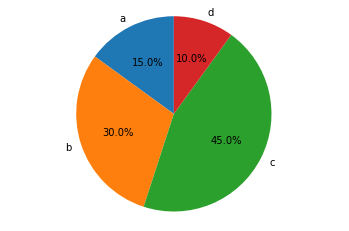

In [165]:
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
plt_pie = ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        startangle=90)
ax1.axis('equal')
fig1.savefig('sample_pie.png')

In [178]:
from matplotlib.path import Path
codeids = [Path.STOP,Path.MOVETO,Path.LINETO,Path.CURVE3,Path.CURVE4,Path.CLOSEPOLY]
codesnames = ['STOP','MOVETO','LINETO','CURVE3','CURVE4','CLOSEPOLY']
codes = {ID:name for (ID,name) in zip(codeids, codesnames)}


wedges = plt_pie[0]
#wedges[0].properties(),
[(w.get_verts()[0], codes[w.get_path().codes[0]]) for w in wedges]
#wcodes = wedges[1].get_path().codes
#wverts = wedges[1].get_verts()
#[(v[0],v[1],codes[c]) for (c,v) in zip(wcodes,wverts)]

[(array([220.64011125, 243.55636316]), 'MOVETO'),
 (array([141.65199831, 203.30990754]), 'MOVETO'),
 (array([190.46934807,  53.06559214]), 'MOVETO'),
 (array([278.02833   , 224.90980174]), 'MOVETO')]

In [179]:
figw = fig1.get_figwidth()
figh = fig1.get_figheight()
figdpi = fig1.get_dpi()
figw, figh = figw * figdpi, figh * figdpi
[w.get_verts()[0] for w in wedges], [w.get_verts()[-2] for w in wedges], figw, figh

([array([220.64011125, 243.55636316]),
  array([141.65199831, 203.30990754]),
  array([190.46934807,  53.06559214]),
  array([278.02833   , 224.90980174])],
 [array([220.64011125, 145.9216888 ]),
  array([220.64011125, 145.9216888 ]),
  array([220.64011125, 145.9216888 ]),
  array([220.64011125, 145.9216888 ])],
 432.0,
 288.0)

In [7]:
# generate auto-annotated pie charts

import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import random
import math

NUM_PIE_CHARTS = 5000
for k in range(NUM_PIE_CHARTS):
    nslices = random.randrange(2,10)
    sizes = [random.random() * 100 for s in range(nslices)]

    lchars = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'
    cn = len(lchars)
    labels = []
    for l in range(nslices):
        #chars = [lchars[random.randrange(cn)] for i in range(random.randrange(3,10))]
        chars = [lchars[random.randrange(cn)] for i in range(random.randrange(3,4))]
        labels.append(''.join(chars))

    startangle = random.random() * 360

    fig1, ax1 = plt.subplots()
    plt_pie = ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=startangle)
    ax1.axis('equal')

    wedges = plt_pie[0]
    figw = fig1.get_figwidth()
    figh = fig1.get_figheight()
    figdpi = fig1.get_dpi()
    figw, figh = figw * figdpi, figh * figdpi
    verts = [w.get_verts()[0] for w in wedges]
    center = wedges[0].get_verts()[-2]
    #verts, center, figw, figh

    imgfile = f'generated_pies/imgs/pie_chart_{k:06}.png'
    fig1.savefig(imgfile)
    plt.close(fig1)

    annotstring = f'r {figw} {figh}\n'                                          # image resolution
    annotstring = annotstring + f'c {center[0]:.2f} {figh - center[1]:.2f}\n'   # pie chart center
    for v in verts:
        vx = (v[0] - (figw / 2)) / 1.56 + (figw / 2) + 2                             # aspect ratio correction
        annotstring = annotstring + f'v {vx:.2f} {figh - v[1]:.2f}\n'           # pie slice vertices

    #print(annotstring)
    annotfile = f'generated_pies/annots/pie_chart_{k:06}.txt'
    with open(annotfile, 'w') as outf:
        outf.write(annotstring)

    print(f'{k}: {nslices} slices')

0: 4 slices
1: 6 slices
2: 5 slices
3: 8 slices
4: 5 slices
5: 3 slices
6: 8 slices
7: 7 slices
8: 4 slices
9: 9 slices
10: 8 slices
11: 4 slices
12: 4 slices
13: 3 slices
14: 2 slices
15: 5 slices
16: 5 slices
17: 7 slices
18: 6 slices
19: 4 slices
20: 7 slices
21: 5 slices
22: 5 slices
23: 3 slices
24: 9 slices
25: 8 slices
26: 8 slices
27: 7 slices
28: 3 slices
29: 5 slices
30: 8 slices
31: 6 slices
32: 9 slices
33: 8 slices
34: 6 slices
35: 9 slices
36: 3 slices
37: 7 slices
38: 3 slices
39: 7 slices
40: 6 slices
41: 4 slices
42: 3 slices
43: 4 slices
44: 7 slices
45: 9 slices
46: 4 slices
47: 6 slices
48: 6 slices
49: 3 slices
50: 4 slices
51: 5 slices
52: 5 slices
53: 8 slices
54: 2 slices
55: 8 slices
56: 6 slices
57: 9 slices
58: 6 slices
59: 9 slices
60: 3 slices
61: 9 slices
62: 4 slices
63: 2 slices
64: 9 slices
65: 2 slices
66: 8 slices
67: 6 slices
68: 9 slices
69: 9 slices
70: 8 slices
71: 3 slices
72: 4 slices
73: 2 slices
74: 2 slices
75: 6 slices
76: 2 slices
77: 2 sli

594: 7 slices
595: 4 slices
596: 2 slices
597: 7 slices
598: 6 slices
599: 6 slices
600: 3 slices
601: 8 slices
602: 5 slices
603: 9 slices
604: 6 slices
605: 6 slices
606: 2 slices
607: 4 slices
608: 6 slices
609: 3 slices
610: 8 slices
611: 9 slices
612: 4 slices
613: 2 slices
614: 6 slices
615: 4 slices
616: 8 slices
617: 3 slices
618: 3 slices
619: 7 slices
620: 9 slices
621: 2 slices
622: 2 slices
623: 5 slices
624: 9 slices
625: 6 slices
626: 5 slices
627: 2 slices
628: 2 slices
629: 8 slices
630: 7 slices
631: 6 slices
632: 7 slices
633: 5 slices
634: 5 slices
635: 7 slices
636: 4 slices
637: 6 slices
638: 2 slices
639: 5 slices
640: 7 slices
641: 3 slices
642: 3 slices
643: 7 slices
644: 6 slices
645: 2 slices
646: 3 slices
647: 4 slices
648: 8 slices
649: 5 slices
650: 8 slices
651: 2 slices
652: 8 slices
653: 3 slices
654: 4 slices
655: 4 slices
656: 2 slices
657: 3 slices
658: 2 slices
659: 5 slices
660: 4 slices
661: 2 slices
662: 6 slices
663: 6 slices
664: 3 slices
665: 3

1169: 8 slices
1170: 2 slices
1171: 9 slices
1172: 7 slices
1173: 8 slices
1174: 8 slices
1175: 3 slices
1176: 9 slices
1177: 3 slices
1178: 5 slices
1179: 4 slices
1180: 5 slices
1181: 9 slices
1182: 9 slices
1183: 6 slices
1184: 6 slices
1185: 4 slices
1186: 7 slices
1187: 8 slices
1188: 7 slices
1189: 6 slices
1190: 7 slices
1191: 4 slices
1192: 4 slices
1193: 3 slices
1194: 9 slices
1195: 7 slices
1196: 5 slices
1197: 6 slices
1198: 3 slices
1199: 5 slices
1200: 5 slices
1201: 9 slices
1202: 8 slices
1203: 3 slices
1204: 9 slices
1205: 7 slices
1206: 5 slices
1207: 4 slices
1208: 6 slices
1209: 6 slices
1210: 7 slices
1211: 2 slices
1212: 2 slices
1213: 8 slices
1214: 5 slices
1215: 3 slices
1216: 9 slices
1217: 8 slices
1218: 5 slices
1219: 5 slices
1220: 7 slices
1221: 5 slices
1222: 2 slices
1223: 3 slices
1224: 5 slices
1225: 3 slices
1226: 2 slices
1227: 6 slices
1228: 6 slices
1229: 4 slices
1230: 5 slices
1231: 6 slices
1232: 9 slices
1233: 3 slices
1234: 2 slices
1235: 8 sl

1718: 3 slices
1719: 9 slices
1720: 2 slices
1721: 2 slices
1722: 7 slices
1723: 6 slices
1724: 7 slices
1725: 3 slices
1726: 2 slices
1727: 2 slices
1728: 9 slices
1729: 7 slices
1730: 6 slices
1731: 7 slices
1732: 2 slices
1733: 6 slices
1734: 9 slices
1735: 8 slices
1736: 3 slices
1737: 3 slices
1738: 3 slices
1739: 4 slices
1740: 3 slices
1741: 6 slices
1742: 6 slices
1743: 9 slices
1744: 7 slices
1745: 4 slices
1746: 7 slices
1747: 2 slices
1748: 9 slices
1749: 6 slices
1750: 8 slices
1751: 3 slices
1752: 6 slices
1753: 6 slices
1754: 9 slices
1755: 5 slices
1756: 8 slices
1757: 3 slices
1758: 6 slices
1759: 6 slices
1760: 8 slices
1761: 6 slices
1762: 9 slices
1763: 8 slices
1764: 3 slices
1765: 6 slices
1766: 5 slices
1767: 4 slices
1768: 9 slices
1769: 3 slices
1770: 4 slices
1771: 8 slices
1772: 4 slices
1773: 6 slices
1774: 6 slices
1775: 6 slices
1776: 3 slices
1777: 6 slices
1778: 5 slices
1779: 4 slices
1780: 2 slices
1781: 9 slices
1782: 6 slices
1783: 3 slices
1784: 8 sl

2273: 4 slices
2274: 9 slices
2275: 7 slices
2276: 8 slices
2277: 3 slices
2278: 9 slices
2279: 7 slices
2280: 3 slices
2281: 7 slices
2282: 4 slices
2283: 3 slices
2284: 2 slices
2285: 6 slices
2286: 4 slices
2287: 2 slices
2288: 3 slices
2289: 5 slices
2290: 7 slices
2291: 4 slices
2292: 5 slices
2293: 4 slices
2294: 9 slices
2295: 5 slices
2296: 3 slices
2297: 5 slices
2298: 6 slices
2299: 8 slices
2300: 3 slices
2301: 7 slices
2302: 9 slices
2303: 8 slices
2304: 7 slices
2305: 9 slices
2306: 7 slices
2307: 5 slices
2308: 7 slices
2309: 7 slices
2310: 3 slices
2311: 6 slices
2312: 9 slices
2313: 4 slices
2314: 7 slices
2315: 7 slices
2316: 6 slices
2317: 5 slices
2318: 7 slices
2319: 2 slices
2320: 5 slices
2321: 6 slices
2322: 4 slices
2323: 5 slices
2324: 8 slices
2325: 5 slices
2326: 7 slices
2327: 7 slices
2328: 5 slices
2329: 7 slices
2330: 5 slices
2331: 4 slices
2332: 5 slices
2333: 9 slices
2334: 6 slices
2335: 4 slices
2336: 3 slices
2337: 8 slices
2338: 3 slices
2339: 9 sl

2828: 9 slices
2829: 5 slices
2830: 2 slices
2831: 5 slices
2832: 2 slices
2833: 9 slices
2834: 5 slices
2835: 8 slices
2836: 3 slices
2837: 3 slices
2838: 3 slices
2839: 9 slices
2840: 6 slices
2841: 6 slices
2842: 8 slices
2843: 7 slices
2844: 5 slices
2845: 6 slices
2846: 9 slices
2847: 8 slices
2848: 8 slices
2849: 6 slices
2850: 9 slices
2851: 8 slices
2852: 2 slices
2853: 3 slices
2854: 8 slices
2855: 9 slices
2856: 4 slices
2857: 2 slices
2858: 2 slices
2859: 8 slices
2860: 3 slices
2861: 7 slices
2862: 7 slices
2863: 7 slices
2864: 6 slices
2865: 6 slices
2866: 7 slices
2867: 4 slices
2868: 4 slices
2869: 8 slices
2870: 2 slices
2871: 5 slices
2872: 4 slices
2873: 9 slices
2874: 9 slices
2875: 5 slices
2876: 3 slices
2877: 7 slices
2878: 5 slices
2879: 6 slices
2880: 9 slices
2881: 9 slices
2882: 5 slices
2883: 3 slices
2884: 4 slices
2885: 6 slices
2886: 4 slices
2887: 2 slices
2888: 5 slices
2889: 4 slices
2890: 8 slices
2891: 2 slices
2892: 8 slices
2893: 5 slices
2894: 5 sl

3381: 2 slices
3382: 3 slices
3383: 4 slices
3384: 7 slices
3385: 4 slices
3386: 4 slices
3387: 5 slices
3388: 4 slices
3389: 6 slices
3390: 4 slices
3391: 7 slices
3392: 3 slices
3393: 2 slices
3394: 9 slices
3395: 3 slices
3396: 8 slices
3397: 6 slices
3398: 7 slices
3399: 3 slices
3400: 7 slices
3401: 2 slices
3402: 8 slices
3403: 6 slices
3404: 8 slices
3405: 6 slices
3406: 2 slices
3407: 2 slices
3408: 4 slices
3409: 2 slices
3410: 5 slices
3411: 7 slices
3412: 2 slices
3413: 3 slices
3414: 7 slices
3415: 4 slices
3416: 6 slices
3417: 8 slices
3418: 9 slices
3419: 5 slices
3420: 4 slices
3421: 6 slices
3422: 2 slices
3423: 9 slices
3424: 7 slices
3425: 8 slices
3426: 3 slices
3427: 2 slices
3428: 7 slices
3429: 9 slices
3430: 4 slices
3431: 2 slices
3432: 3 slices
3433: 8 slices
3434: 6 slices
3435: 5 slices
3436: 2 slices
3437: 3 slices
3438: 8 slices
3439: 5 slices
3440: 8 slices
3441: 7 slices
3442: 9 slices
3443: 5 slices
3444: 5 slices
3445: 2 slices
3446: 9 slices
3447: 2 sl

3930: 4 slices
3931: 7 slices
3932: 4 slices
3933: 3 slices
3934: 3 slices
3935: 8 slices
3936: 2 slices
3937: 9 slices
3938: 7 slices
3939: 9 slices
3940: 6 slices
3941: 7 slices
3942: 6 slices
3943: 6 slices
3944: 9 slices
3945: 7 slices
3946: 9 slices
3947: 6 slices
3948: 4 slices
3949: 4 slices
3950: 8 slices
3951: 6 slices
3952: 5 slices
3953: 7 slices
3954: 5 slices
3955: 5 slices
3956: 4 slices
3957: 5 slices
3958: 8 slices
3959: 6 slices
3960: 7 slices
3961: 8 slices
3962: 5 slices
3963: 3 slices
3964: 7 slices
3965: 7 slices
3966: 4 slices
3967: 9 slices
3968: 8 slices
3969: 3 slices
3970: 9 slices
3971: 5 slices
3972: 9 slices
3973: 8 slices
3974: 4 slices
3975: 2 slices
3976: 2 slices
3977: 4 slices
3978: 8 slices
3979: 9 slices
3980: 2 slices
3981: 4 slices
3982: 7 slices
3983: 3 slices
3984: 2 slices
3985: 3 slices
3986: 7 slices
3987: 8 slices
3988: 8 slices
3989: 3 slices
3990: 5 slices
3991: 8 slices
3992: 6 slices
3993: 5 slices
3994: 4 slices
3995: 7 slices
3996: 5 sl

4478: 4 slices
4479: 4 slices
4480: 5 slices
4481: 9 slices
4482: 4 slices
4483: 6 slices
4484: 9 slices
4485: 3 slices
4486: 7 slices
4487: 3 slices
4488: 2 slices
4489: 6 slices
4490: 8 slices
4491: 8 slices
4492: 3 slices
4493: 3 slices
4494: 6 slices
4495: 9 slices
4496: 7 slices
4497: 8 slices
4498: 9 slices
4499: 7 slices
4500: 8 slices
4501: 6 slices
4502: 2 slices
4503: 8 slices
4504: 9 slices
4505: 4 slices
4506: 2 slices
4507: 4 slices
4508: 7 slices
4509: 5 slices
4510: 2 slices
4511: 3 slices
4512: 7 slices
4513: 6 slices
4514: 2 slices
4515: 8 slices
4516: 9 slices
4517: 5 slices
4518: 3 slices
4519: 6 slices
4520: 9 slices
4521: 8 slices
4522: 5 slices
4523: 7 slices
4524: 2 slices
4525: 9 slices
4526: 4 slices
4527: 9 slices
4528: 4 slices
4529: 2 slices
4530: 3 slices
4531: 7 slices
4532: 3 slices
4533: 3 slices
4534: 7 slices
4535: 3 slices
4536: 7 slices
4537: 6 slices
4538: 4 slices
4539: 5 slices
4540: 2 slices
4541: 5 slices
4542: 8 slices
4543: 7 slices
4544: 3 sl

pie_chart_001439.png
['c', '222.15', '143.35']
['v', '131.16', '177.99']
['v', '156.98', '216.11']
['v', '201.29', '239.03']
['v', '319.00', '144.74']
['v', '318.98', '140.82']
['v', '128.56', '170.05']
imgres (432, 288)


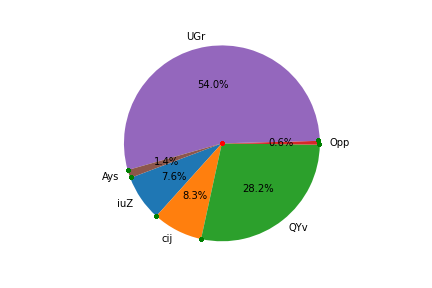

In [10]:
# visualize auto-annotated pie charts
import os
from PIL import Image, ImageDraw

R = 2                               # elipse radius

img_dir = 'generated_pies/imgs/'
annot_dir = 'generated_pies/annots/'

imgs = sorted(os.listdir(img_dir))
img_fn = random.choice(imgs)
annot_fn = img_fn[:-3] + 'txt'
print(img_fn)

annots = [l.split() for l in open(annot_dir + annot_fn).read().splitlines()]

img = Image.open(img_dir + img_fn)
img_draw = ImageDraw.Draw(img)
for annot in annots:
    if annot[0] == 'c':
        color='red'
    elif annot[0] == 'v':
        color='green'
    else:
        continue
    x,y = float(annot[1]), float(annot[2])
    print(annot)
    shape = (x-R,y-R,x+R,y+R)
    img_draw.ellipse(shape, fill=color, outline=color)
print('imgres', img.size)
img

In [2]:
dir(plt)

['Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Circle',
 'Figure',
 'FigureCanvasBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'Number',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotTool',
 'Text',
 'TickHelper',
 'Widget',
 '_INSTALL_FIG_OBSERVER',
 '_IP_REGISTERED',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_auto_draw_if_interactive',
 '_backend_mod',
 '_get_running_interactive_framework',
 '_interactive_bk',
 '_log',
 '_pylab_helpers',
 '_setp',
 '_setup_pyplot_info_docstrings',
 '_show',
 'acorr',
 'angle_spectrum',
 'annotate',
 'arrow',
 'autoscale',